<img src="attachment" width="350" style="margin-left:auto; margin-right:auto" />
<h1><center>Project: Stochastic Gradient Descent on Linear Regression</center></h1>

#### Scenario
For this exercise, we step into the role of somebody who likes to go to the gym. However, this person hates getting to the gym and finding that it is so crowded that this person must wait to use the machines. Luckily, we have all the skills and knowledge to build a model that will help us predict the best time to go to the gym and avoid crowds, so this person can enjoy a great workout with minimal wait times and no crowds. Our task is to use the "Crowdedness at the Campus Gym” dataset, which contains historic information about how crowded the campus gym is on a given day and hour, as well as other specific information about the specific days.

We'll use the `Pandas` library to load the dataset into a DataFrame, run exploratory data analysis, and clean the dataset for training a model. After cleaning the set, we'll split the data into training and testing sets. Then, we'll use the `SDGRegressor` from the `Scikit Learn` library to build and train a stochastic gradient descent linear regression model to predict how many people are at the gym on a given day from the features inputed. Finally, you we'll evaluate the model and visualize the results using `matplotlib`.

#### Data

This dataset contains over 60,000 observations about how many people were at the gym on a particular day and time. It contains 11 columns that contain the following information.

- `number_people`: this is the number of people at the gym at each observation. This will be our target variable or label.
- `date`: a string value with the specific date and time information.
- `timestamp`: an integer (int), with the number of seconds since the start of the day (00:00).
- `dayofweek`: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
- `is_weekend`: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
- `is_holiday`: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
- `temperature`: a float, defining the temperature during the day of the observation in Fahren_heit._
- `is_start_of_semester`: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
- `is_during_semester`: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
- `month`: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
- `hour`: an integer (int) for the hour of the day from 0 to 23.

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*

#### Import Libraries and Load the Data

In [1]:
# Load initial packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Set visualization parameters
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_palette('deep')

In [2]:
# Load the Dataset
gym_crowd = pd.read_csv('crowdness_gym_data.csv')

#### EDA

To gain an initial understanding of the dataset, we'll performed basic exploratory analysis by executing the .head() method. This command provides a preview of the first few rows, allowing me to get a general overview of the data structure and contents.


In [3]:
# Print first rows of dataset
gym_crowd.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
# Print information about the dataset
gym_crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


The dataset primarily consists of numeric and integer values, with the exceptions being the temperature column (which is a float, as temperatures are rarely whole numbers) and the date column (which could potentially cause issues due to its object datatype).

To obtain further insights, we'll utilized the .describe() method. This function provides summary statistics for the dataset, including measures such as mean, standard deviation, and range, which help in understanding the distribution and characteristics of the data.

In [5]:
# Print additional aggregate information about the data
gym_crowd.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


The data appears relatively straightforward. The `date` column, being an object datatype, does not provide any statistical summaries and may be challenging to work with. Most other features seem well-structured, with binary features like `is_holiday` and `is_weekend` functioning as expected.

To ensure data integrity, we'll check for any missing (null) values in the dataset using the .isnull() method combined with .sum() to aggregate the count of null values across all columns.

In [6]:
# Check for null values
gym_crowd.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

Currently, the `date` column appears to be redundant as it is represented as an object datatype. Given that the dataset includes other features that capture specific day and time information, this column does not provide additional value. Therefore, we'll remove the date column using the .drop() method. Afterward, we'll execute .head() to confirm that the date column has been successfully removed.

In [7]:
# Remove the data column
gym_crowd = gym_crowd.drop(columns=['date'])
gym_crowd.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


In [8]:
# Transform fahrenheit into celsius
gym_crowd['temperature_c'] = round((gym_crowd['temperature'] - 32) * 5 / 9, 1)
gym_crowd['temperature_c']

# Drop fahrenheit column
gym_crowd.drop(columns=['temperature'], inplace=True)

# Transform month numbers into month names for plot
gym_crowd['months'] = gym_crowd['month'].apply(lambda x: calendar.month_name[x])
gym_crowd['months']

0        August
1        August
2        August
3        August
4        August
          ...  
62179     March
62180     March
62181     March
62182     March
62183     March
Name: months, Length: 62184, dtype: object

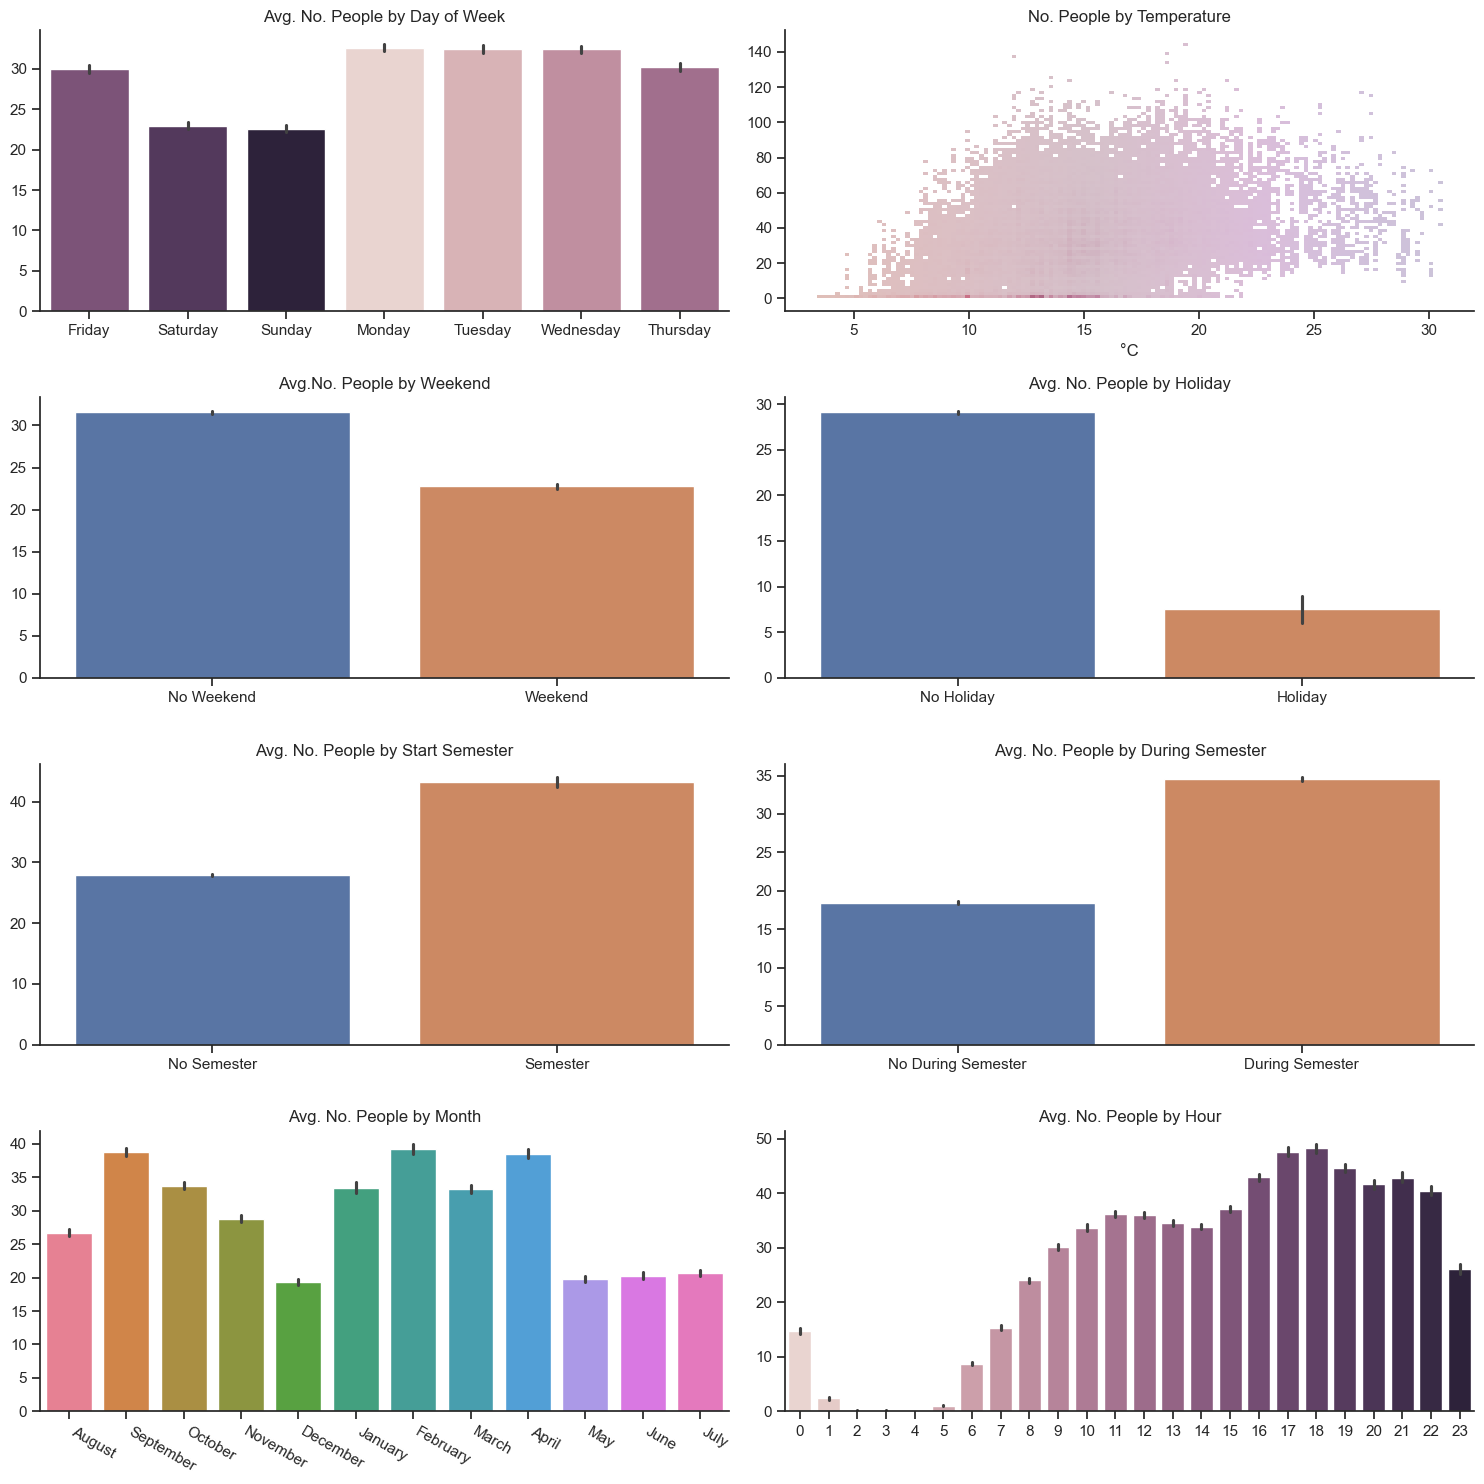

In [9]:
# Create plots for predictors vs. target value
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

# Day of the week plot using countplot
ax1 = sns.barplot(x=gym_crowd['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}),
                  y='number_people', data=gym_crowd, ax=axs[0, 0], hue='day_of_week')
ax1.set(xlabel="", ylabel="", title='Avg. No. People by Day of Week')

# Temperature plot using histplot
ax2 = sns.histplot(x='temperature_c', y='number_people', 
                   hue='temperature_c', data=gym_crowd, ax=axs[0, 1])
ax2.set(xlabel="°C", ylabel="", title="No. People by Temperature")

# Weekend plot using countplot
ax3 = sns.barplot(x=gym_crowd['is_weekend'].map({0: 'No Weekend', 1: 'Weekend'}), 
                    y='number_people', data=gym_crowd, hue='is_weekend', ax=axs[1, 0])
ax3.set(xlabel="", ylabel="", title="Avg.No. People by Weekend")

# Holiday plot using countplot
ax4 = sns.barplot(x=gym_crowd['is_holiday'].map({0: 'No Holiday', 1: 'Holiday'}), 
                    y='number_people', data=gym_crowd, hue='is_holiday', ax=axs[1, 1])
ax4.set(xlabel="", ylabel="", title="Avg. No. People by Holiday")

# Start of semester plot using countplot
ax5 = sns.barplot(x=gym_crowd['is_start_of_semester'].map({0: 'No Semester', 1: 'Semester'}),  
                    y='number_people', data=gym_crowd, hue='is_start_of_semester', ax=axs[2, 0])
ax5.set(xlabel="", ylabel="", title="Avg. No. People by Start Semester")

# During semester plot using countplot
ax6 = sns.barplot(x=gym_crowd['is_during_semester'].map({0: 'No During Semester', 1: 'During Semester'}), 
                    y='number_people', data=gym_crowd, hue='is_during_semester', ax=axs[2, 1])
ax6.set(xlabel="", ylabel="", title="Avg. No. People by During Semester")

# Month plot using countplot
ax7 = sns.barplot(x='months', y='number_people', data=gym_crowd, hue='months', ax=axs[3, 0])
ax7.set(xlabel="", ylabel="", title="Avg. No. People by Month")
plt.setp(ax7.get_xticklabels(), rotation=-30, ha="left") # rotate xlabels

# Hour plot using countplot
ax8 = sns.barplot(x='hour', y='number_people', data=gym_crowd, hue='hour', ax=axs[3, 1])
ax8.set(xlabel="", ylabel="", title="Avg. No. People by Hour")

# Remove legends from plots
for ax in axs.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    
plt.tight_layout()
plt.show()

Based on the visualizations, we can derive the following insights:

- Day of the Week: The highest average number of gym visitors is observed on Monday, Tuesday, and Wednesday, with an average count of ~35 people.

- Weekend and Holiday Effects: Attendance tends to be higher on weekdays compared to weekends, and similarly, gym usage is greater on non-holiday days.

- Academic Calendar Impact: There is an increase in average gym attendance during the initial two weeks of a new semester and when a semester is currently ongoing.

- Monthly Trends: The months with the highest average number of visitors are September, February, and April.

- Time of Day: The lowest average attendance is observed between 1 AM and 5 AM.

#### Target vs. Predictors

In [10]:
# Calculate correlation
correlations = gym_crowd.corr(numeric_only=True)
correlations

,number_people,timestamp,day_of_week,is_weekend,is_holiday,is_start_of_semester,is_during_semester,month,hour,temperature_c
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.182683,0.335350,-0.097854,0.552049,0.373228
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.009551,0.044676,-0.023221,0.999077,0.184883
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,-0.011782,-0.004824,0.015559,-0.001914,0.011212
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,-0.016646,-0.036127,0.008462,-0.000517,0.020849
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.014858,-0.070798,-0.094942,0.002843,-0.088635
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,1.000000,0.209862,-0.137160,0.010091,0.093314
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.209862,1.000000,0.096556,0.045581,0.152512
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,-0.137160,0.096556,1.000000,-0.023624,0.063190
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.010091,0.045581,-0.023624,1.000000,0.185154
temperature_c,0.373228,0.184883,0.011212,0.020849,-0.088635,0.093314,0.152512,0.063190,0.185154,1.000000


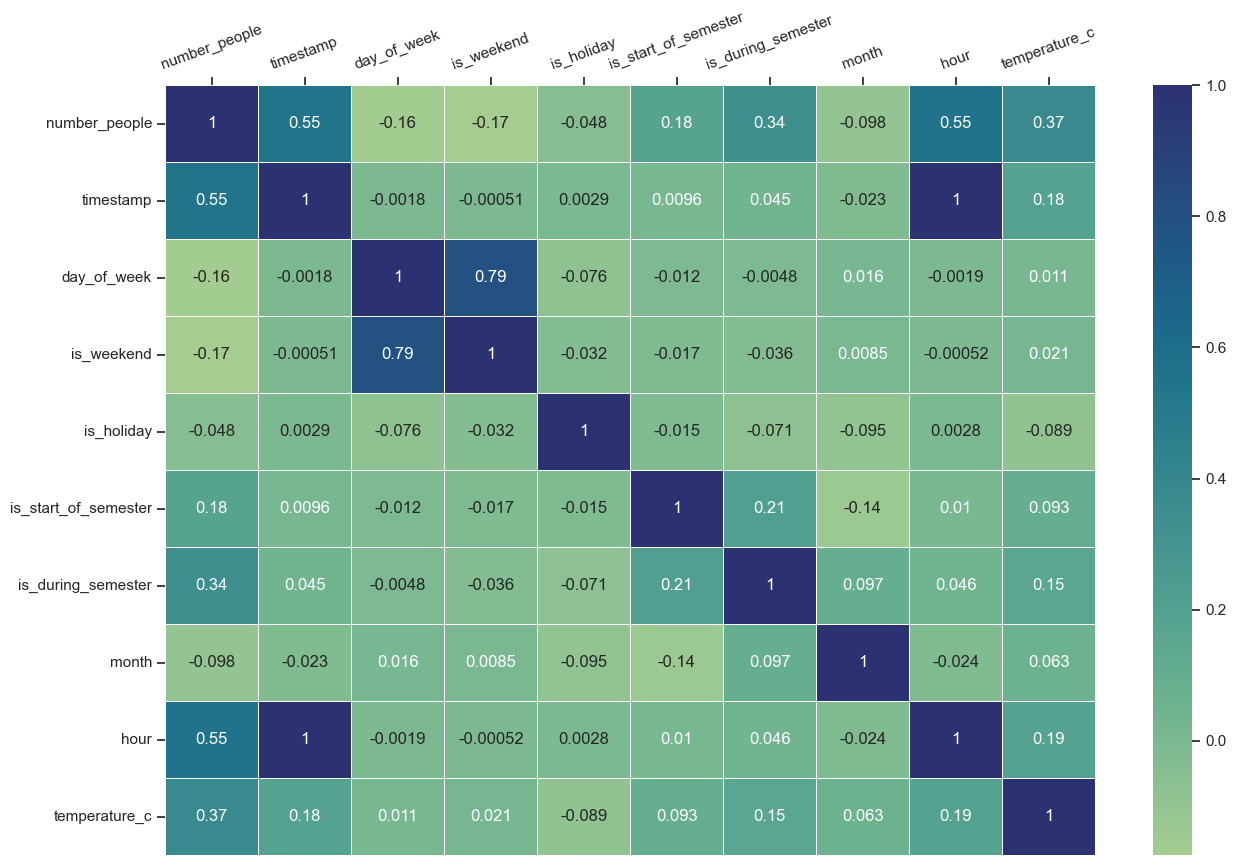

In [11]:
# Heatmap for correlation
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(correlations, cmap="crest", annot=True, linewidths=.5, ax=ax)

# Set xlabel to top, rotate labels
ax.xaxis.tick_top()
plt.xticks(rotation=20) 

plt.show()

The correlation analysis reveals some interesting results:

- Hour: There is a strong positive correlation of 0.55 between the target variable number_people and the predictor hour. This indicates that as the hour of the day progresses, the number of people in the gym tends to increase, meaning more people are present later in the day.

- Temperature: The correlation between number_people and temperature is 0.37, which indicates a moderate positive relationship. This suggests that higher temperatures are associated with a higher number of people in the gym, though the correlation is not very strong.

- During Semester: There is a moderate positive correlation of 0.34 between number_people and is_during_semester. This implies that the number of people in the gym tends to be higher during the semester.

- Start of Semester: The correlation between number_people and is_start_of_semester is 0.18, showing a weak positive correlation. This indicates a slight increase in the number of people at the start of the semester.

- Weekend and Day of Week:

    - is_weekend: The correlation is -0.17, which is a weak negative correlation. This suggests that the number of people in the gym tends to be slightly lower on weekends.
    - day_of_week: The correlation is -0.16, which is also a weak negative correlation. This implies that the number of people in the gym tends to decrease as the days of the week progress, although the effect is minor.

Note:

- Timestamp and Hour: The correlation between timestamp and hour is 1.00. This is expected because the timestamp includes the hour of the day. Therefore, timestamp and hour are perfectly correlated, as timestamp essentially captures the hour as part of its data.
- The correlation between day_of_week and is_weekend is 0.79. This strong positive correlation indicates that the day_of_week variable and is_weekend are closely related. Specifically, the day_of_week variable includes weekends, and this correlation shows that as the day of the week progresses towards the weekend, the probability of it being a weekend day increases.

In summary, the most relevant correlations are between number_people and hour (strong positive) and temperature (moderate positive). Other variables have weaker correlations with number_people.

#### VIF

In [12]:
# Include statsmodels variance_inflation_factor to calculate the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Save predictors into dataframe
data = gym_crowd[['hour', 'temperature_c', 'is_during_semester', 'is_start_of_semester', 'day_of_week', 'is_weekend']]

# Add constant for every regression
vif_with_const = add_constant(data)

# Calculate the VIF for every variable
vif_data = pd.DataFrame()
vif_data["Variable"] = vif_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(vif_with_const.values, i) for i in range(vif_with_const.shape[1])]

# Show output
print(vif_data)

               Variable        VIF
0                 const  23.419390
1                  hour   1.035976
2         temperature_c   1.063717
3    is_during_semester   1.069594
4  is_start_of_semester   1.050584
5           day_of_week   2.680060
6            is_weekend   2.684967


A we can see, all VIF values are around 1-2. 

Explanation:
- VIF < 5: acceptable, low Multicollinearity.
- VIF between 5 - 10: maybe problematic, should be checked.
- VIF > 10: high Multicollinearity --> problematic

#### First Model

In [13]:
# Load additional packages for regression analysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [14]:
# Split target and predictors
y = gym_crowd['number_people']
X = gym_crowd[['hour', 'temperature_c', 'is_during_semester', 'is_start_of_semester', 'day_of_week', 'is_weekend']]

# Split data in test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [15]:
# Initialise scaler
scaler = StandardScaler()

# Fit and transform x_train data
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test data
X_test_scaled = scaler.transform(X_test)

In [16]:
# Initialise sgdregressor with hyperparameters
sgdr = SGDRegressor(tol = 0.0001, eta0=0.0001, random_state=42)

# Fit sgdr regressor with train data
sgdr.fit(X_train_scaled, y_train)

# Calculate predicted values with test values
y_pred_one = sgdr.predict(X_test_scaled)

In [17]:
# Save mean_squared_error
rmse = mean_squared_error(y_test, y_pred_one)

# Save mean_absolute_error
rmse_absolut = mean_absolute_error(y_test, y_pred_one)

# Save r2 score
r2_score_one = r2_score(y_test, y_pred_one)

In [18]:
# Print values of rmse, mae, r2
print(f'RMSE: {rmse}')
print(f'RMSE_absolut: {rmse_absolut}')
print(f'R2: {r2_score_one}')

RMSE: 257.1676722336885
RMSE_absolut: 12.293630075353185
R2: 0.5010692571267821


The R2 value of 0.501 is mediocre. The absolut RMSE (our Cost) shows us, that the error of persons per day is about +- 12 people, which is quite high regarding the fact, that the average value of people is 29. Lets try a new model, removing some features that seem to be less relevant and adjust the hyperparameters of our model.



#### Second Model

In [19]:
yn = gym_crowd['number_people']

# Create dummies for day of week column
gym_crowd_dummies = pd.get_dummies(gym_crowd, columns=['day_of_week'], drop_first=True)

# Dropping is_weekend in new model, since weekend will be captured by day of week
Xn = gym_crowd_dummies[['hour', 'temperature_c', 'is_during_semester', 'is_start_of_semester', 
               'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6']]

In [20]:
# Split data in test and train data
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=.3, random_state=42)

In [21]:
# Initialise scaler
scaler = StandardScaler()

# Fit and transform x_train data
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test data
X_test_scaled = scaler.transform(X_test)

In [22]:
# Initialise sgdregressor with hyperparameters
sgdr = SGDRegressor(tol=0.0001, eta0=0.0001, max_iter=10000, random_state=42)

# Fit sgdr regressor with train data
sgdr.fit(X_train_scaled, y_train)

# Calculate predicted values with test values
y_pred_two = sgdr.predict(X_test_scaled)

In [23]:
# Save mean_squared_error, mean_absolute_error, r2_score
rmse = mean_squared_error(y_test, y_pred_two)
rmse_absolut = mean_absolute_error(y_test, y_pred_two)
r2_score_two = r2_score(y_test, y_pred_two)

In [24]:
# Print values of rmse, mae, r2
print(f'RMSE: {rmse}')
print(f'RMSE_absolut: {rmse_absolut}')
print(f'R2: {r2_score_two}')

RMSE: 257.0767895999343
RMSE_absolut: 12.29300953765891
R2: 0.5012455784333423


#### Third Model - GridSearchCV 

In [25]:
yk = gym_crowd['number_people']

gym_crowd_cv = pd.get_dummies(gym_crowd, columns=['day_of_week'], drop_first=True)

Xk = gym_crowd_cv[['hour', 'temperature_c', 'is_during_semester', 'is_start_of_semester', 
               'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Xk, yk, test_size=.3, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set parameters for GridSearch, estimator = SGDRegressor
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.0001, 0.001, 0.01],  
    'max_iter': [1000, 5000, 10000],  
    'penalty': ['l2', 'l1', 'elasticnet'],
    'l1_ratio': [0.15, 0.5, 0.8], 
    'tol': [0.0001, 0.001, 0.01]
}

# Initialize SGDRegressor only with random state
sgdr = SGDRegressor(random_state=42)

# Initialize GridSearchCV, with parameters set before
grid_search = GridSearchCV(estimator=sgdr, param_grid=param_grid, scoring='r2')

# Fit grid_search on train data
grid_search.fit(X_train_scaled, y_train)

# Save best estimators
best_sgdr = grid_search.best_estimator_

# Save best parameters
best_params = grid_search.best_params_

In [29]:
# Print best estimators, parameters
print(f'Best estimator: {best_sgdr}')
print(f'Best parameters: {best_params}')

Best estimator: SGDRegressor(eta0=0.001, penalty='l1', random_state=42, tol=0.0001)
Best parameters: {'alpha': 0.0001, 'eta0': 0.001, 'l1_ratio': 0.15, 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.0001}


In [30]:
# Use best_sgdr estimator for prediction
y_pred_three = best_sgdr.predict(X_test_scaled)

# Save mean_squared_error, mean_absolute_error, r2_score
rmse = mean_squared_error(y_test, y_pred_three)
rmse_absolut = mean_absolute_error(y_test, y_pred_three)
r2_score_three = r2_score(y_test, y_pred_three)

In [31]:
# Print values of rmse, mae, r2
print(f'RMSE: {rmse}')
print(f'RMSE_absolut: {rmse_absolut}')
print(f'R2: {r2_score_three}')

RMSE: 257.0937467576921
RMSE_absolut: 12.291963459482462
R2: 0.5012126798685901


#### Visualize the Prediction

To evaluate our model's performance effectively, visualization is crucial. We employed line plots to compare the model's predictions against the actual test data. In the plot, the actual data is represented in the background, while the predicted values are overlaid. Regions where the predicted and actual lines converge indicate strong model performance, whereas areas of divergence highlight where the model's predictions are less accurate.

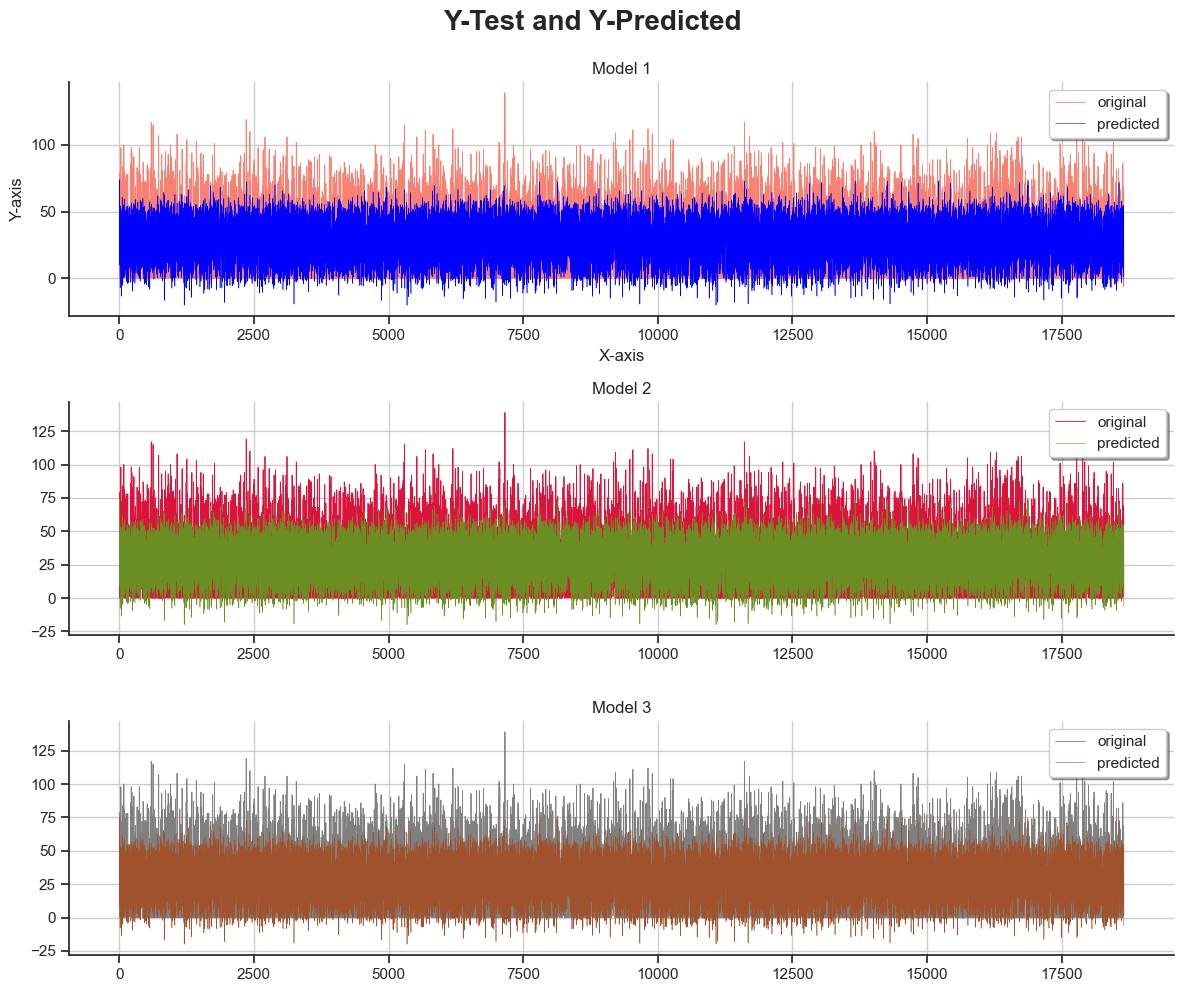

In [32]:
# Create figure and axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

x_ax = range(len(y_test))
fig.suptitle('Y-Test and Y-Predicted', y=0.99, fontsize=20, fontweight='bold')

# Model 1
ax1.plot(x_ax, y_test, linewidth=0.6, label="original", color='salmon')
ax1.plot(x_ax, y_pred_one, linewidth=0.4, label="predicted", color='blue')
ax1.set_title("Model 1", size=12)
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.legend(loc='best',fancybox=True, shadow=True)
ax1.grid(True)

# Model 2
ax2.plot(x_ax, y_test, linewidth=0.6, label="original", color='crimson')
ax2.plot(x_ax, y_pred_two, linewidth=0.4, label="predicted", color='olivedrab')
ax2.set_title("Model 2", size=12)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend(loc='best',fancybox=True, shadow=True)
ax2.grid(True)

# Model 3
ax3.plot(x_ax, y_test, linewidth=0.6, label="original", color='gray')
ax3.plot(x_ax, y_pred_two, linewidth=0.4, label="predicted", color='sienna')
ax3.set_title("Model 3", size=12)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.legend(loc='best',fancybox=True, shadow=True)
ax3.grid(True)

plt.tight_layout()
plt.show() 

#### Conclusion and Modelanalysis

In this analysis, three different models were built to predict the number of people in a gym based on various features. Here's a summary of the steps taken, the results obtained, and recommendations for future improvements.

#### Model 1

Features Used:
- Hour
- Temperature (°C)
- Is During Semester
- Is Start of Semester
- Day of Week
- Is Weekend

Performance Metrics:
- RMSE: 257.17
- MAE: 12.29
- R²: 0.501
  
Description: Model 1 used the original dataset with a mix of numerical and categorical features. The data was scaled using StandardScaler and then fed into an SGDRegressor. The performance metrics indicate that the model has moderate accuracy, with an R² value of approximately 0.501, meaning that about 50% of the variance in the number of people is explained by the model.

#### Model 2

Features Used:

- Hour
- Temperature (°C)
- Is During Semester
- Is Start of Semester
- One-Hot Encoded Day of Week (excluding weekend)

Performance Metrics:

- RMSE: 257.08
- MAE: 12.29
- R²: 0.501

Description: In Model 2, the categorical feature 'day_of_week' was one-hot encoded to capture the influence of each day more explicitly. This approach slightly improved the R² score and maintained similar RMSE and MAE compared to Model 1. This suggests that explicitly modeling the day of the week has a marginal impact on the predictive performance of the model.

#### Model 3

Features Used:

- Hour
- Temperature (°C)
- Is During Semester
- Is Start of Semester
- One-Hot Encoded Day of Week (excluding weekend)

Optimization:
- Grid Search was applied to find the best hyperparameters for the SGDRegressor.

Best Parameters Found:

- Alpha: 0.0001
- Eta0: 0.001
- Max Iter: 1000
- Penalty: 'l1'
- Tolerance: 0.0001

Performance Metrics:

- RMSE: 257.09
- MAE: 12.29
- R²: 0.501
  
Description: Model 3 included hyperparameter tuning using Grid Search to optimize the SGDRegressor. Despite the search for the best parameters, the improvement in performance metrics was minimal. The R² score remained around 0.501, and the changes in RMSE and MAE were negligible.


#### Conclusion
While the models provided useful insights and marginal improvements, there is potential for better performance through more sophisticated techniques and feature enhancements. The existing models offer a good starting point but refining and expanding the approach could lead to significantly better predictions. Overall, based on the data and model insights, for individuals who prefer to visit the gym frequently while avoiding crowds, a visit at 5 AM on any day appears to be a consistently low-traffic option.